### Loan lending Exploratory data analysis

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilnbajaj/loans-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sriku\.cache\kagglehub\datasets\sahilnbajaj\loans-data\versions\1


#### imports

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# xgboost 
import xgboost as xgb
import catboost as cb

# setting up genetic algorithm framework
from deap import base, creator, tools

In [4]:
import os
os.listdir(path)

['loan_data.csv']

In [5]:
import pandas as pd
df = pd.read_csv(path+'/loan_data.csv')

In [6]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Credit Policy Dataset Features

- **credit.policy**: Indicates whether the loan was approved or not.  
- **purpose**: The reason for taking the loan.  
- **int.rate**: Interest rate of the loan.  
- **installment**: Fixed installment amount to be paid by the borrower.  
- **log.annual.inc**: Log-transformed annual income of the borrower.  
- **dti**: Debt-to-income ratio.  
- **fico**: Credit score of the borrower.  
- **days.with.cr.line**: Number of days since the borrower’s oldest credit account was first opened.  
- **revol.bal**: The borrower’s revolving balance (amount currently owed on credit).  
- **revol.util**: Percentage of available revolving credit being used.  
- **inq.last.6mths**: Number of loan inquiries made by the borrower in the last 6 months.  
- **delinq.2yrs**: Number of times the borrower has been 30+ days late on a debt payment in the last 2 years.  
- **pub.rec**: Public derogatory records such as bankruptcies.  
- **not.fully.paid** *(Target Column)*: Indicates whether the borrower was able to fully repay the loan.  


In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

No null values in the dataframe, as mentioned in the data card.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

The data is not uniformly distributed for the feature purpose, this should be fine as we cannot duplicate or remove data- it could lead to either loss of data or redundant data.

One important observation:

debt consolidation has the largest amount of transactions, then comes in credit card.

<Axes: >

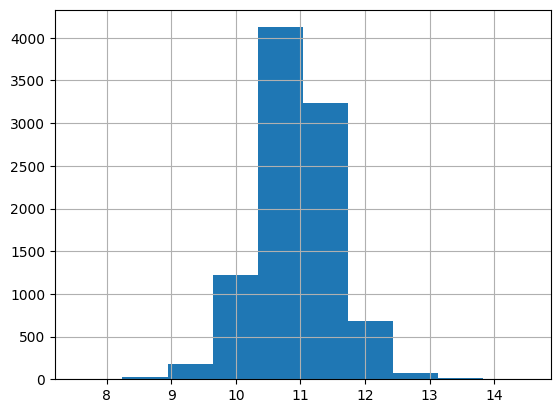

In [12]:
df['log.annual.inc'].hist()

The annual income resembles a normal distriibution, so not much of outliers, still have to check the mean, max, min quartiles to make sure of it.
The annual income of the borrower log().

In [13]:
annual_income=df['log.annual.inc']
max_,min_,mean_,median_=annual_income.max(),annual_income.min(),annual_income.mean(),annual_income.median()
max_,min_,mean_,median_

(np.float64(14.52835448),
 np.float64(7.547501683),
 np.float64(10.932117137800272),
 np.float64(10.92888357))

In [14]:
len(df.columns)

14

<Axes: xlabel='not.fully.paid'>

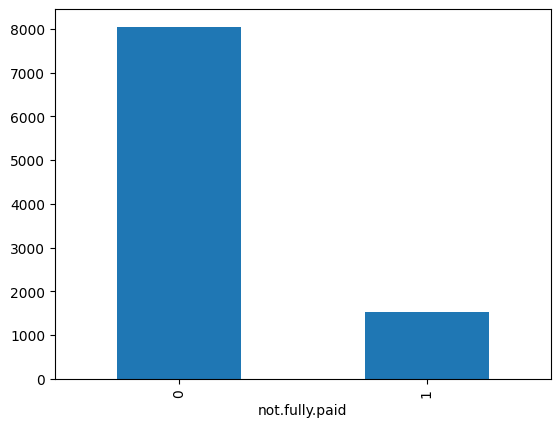

In [15]:
df['not.fully.paid'].value_counts().plot(kind='bar')

Not really a balanced set, but it is real world data and it is expected to have less cases of defaulters.

In [16]:
##### For numerical features, correlation matrix
df_=df.drop(columns=['purpose'],axis=1)
df_.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [17]:
df_.corr()['not.fully.paid']

credit.policy       -0.158119
int.rate             0.159552
installment          0.049955
log.annual.inc      -0.033439
dti                  0.037362
fico                -0.149666
days.with.cr.line   -0.029237
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
delinq.2yrs          0.008881
pub.rec              0.048634
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

The pearson correlation between the features and target suggest, no strong correlation between feature and target, but they do affect the target. The correlation suggests, the effect of feature on target is not linear, may be to some other degree, quadratic, or cubic relation or bi quadratic or polynomial relation.

other tests like anova and chi square test, wont be useful aswel as anova is for numerical, chi square is for categorical data

Try sorting it out with decision tree - the solution may not be complete or may not get the result expected, kaggle competition, shall be tougher, then try out different classification models (binary) before moving towards neural network.

1. Start with deicsion tree
2. numeric encode the purpose feature
3. try other classification models,

In [18]:
# decision tree classifier
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [19]:
df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [20]:
x=df.drop(columns=['not.fully.paid'],axis=1)

In [21]:
onehot_encoder=OneHotEncoder()

onehot_encoded=onehot_encoder.fit_transform(pd.DataFrame(df.purpose)).toarray()
onehot_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(9578, 7))

In [22]:
onehot_encoder.categories_[0]

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [23]:
x[x.purpose.value_counts().index[0]]=np.zeros(len(x))

In [24]:

for idx,i in enumerate(onehot_encoder.categories_[0]):
    x[i]=onehot_encoded[:,idx]

x.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,debt_consolidation,all_other,credit_card,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
print(True )
check=[True for i in range(len(x)) if x[x.purpose[i]][i]==1]

True


In [26]:
np.array(check).all()

np.True_

The one hot encoding is successful for the given data.

In [27]:
x.drop(columns=['purpose'],axis=1,inplace=True)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,df['not.fully.paid'],test_size=0.2,random_state=42)

In [29]:
len(x_train),len(x_test),len(y_train),len(y_test)   

(7662, 1916, 7662, 1916)

### Setting up metrics of comparisons for the classifiers

In [30]:
def get_metrics(y_true,y_preds):
    '''
    The function takes in true labels and predicted labels in numeric form and computes
    accuracy,
    precision,
    recall,
    f1 score
     return a dictionary of the metrics
    '''
    acc=sklearn.metrics.accuracy_score(y_true,y_preds)  
    prec=sklearn.metrics.precision_score(y_true,y_preds)
    recall=sklearn.metrics.recall_score(y_true,y_preds)
    f1=sklearn.metrics.f1_score(y_true,y_preds)
    metrics={
        'Accuracy':acc,
        'Precision':prec,
        'Recall':recall,
        'F1Score':f1
    }
    return metrics

### Decision Tree classifier

In [31]:
tree_clf=sklearn.tree.DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
x_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,debt_consolidation,all_other,credit_card,educational,home_improvement,major_purchase,small_business
7317,1,0.1459,327.42,9.994242,11.41,692,5239.041667,144,28.8,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
350,1,0.0838,236.34,11.225243,6.06,742,3149.041667,4286,40.4,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5206,1,0.1148,138.47,11.170435,6.83,717,3810.000000,11974,72.1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2673,1,0.0932,527.13,11.058858,8.35,732,4079.958333,41921,85.2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3528,1,0.1126,312.21,10.693398,19.04,757,7049.958333,336,4.7,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
y_preds_test=tree_clf.predict(x_test)
y_preds_train=tree_clf.predict(x_train)

In [34]:
print(f"The accuracy of classification using sklearn classifier: {tree_clf.score(x_test,y_test)}")

The accuracy of classification using sklearn classifier: 0.7343423799582464


In [35]:
pd.DataFrame({"y_test":y_test,"y_preds_test":y_preds_test})

,y_test,y_preds_test
8558,0,0
4629,0,0
1383,1,0
8142,0,0
1768,0,0
...,...,...
1017,1,0
6755,0,0
3114,0,0
7902,0,0


In [36]:
pd.DataFrame(y_preds_test).value_counts()

0
0    1572
1     344
Name: count, dtype: int64

In [37]:
pd.DataFrame(y_test).value_counts()

not.fully.paid
0                 1611
1                  305
Name: count, dtype: int64

No suspicion of model underperforming or defaulting to zero

Text(0.5, 1.0, 'Confusion matrix for Decision tree classifier on testing data')

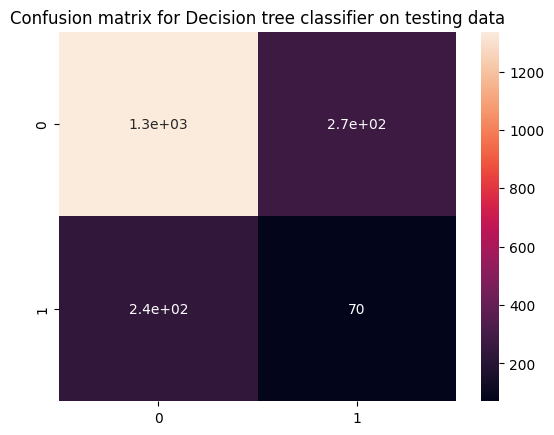

In [38]:
conf_mat=sklearn.metrics.confusion_matrix(y_test,y_preds_test)
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion matrix for Decision tree classifier on testing data")

In [39]:
conf_mat

array([[1337,  274],
       [ 235,   70]])

In [40]:
tree_clf.score(x_train,y_train)   

1.0

In [41]:
dt_metrics=get_metrics(y_test,y_preds_test)
dt_metrics

{'Accuracy': 0.7343423799582464,
 'Precision': 0.20348837209302326,
 'Recall': 0.22950819672131148,
 'F1Score': 0.21571648690292758}

In [42]:
get_metrics(y_train,y_preds_train)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1Score': 1.0}

Overfitting is visible, try random forest, then boosting models like xgboost, catboost are not likely to workout, given bosting techniques are greedy trchniques to improve the fit on training data, which potentially leads to overfitting, this is regulated using mechanisms like shrinkage, tree balancing and stochastic gradient boosting. But still not the favourites in this case.

The precision and recall values for the tree classifier shows that the models performance is far from ideal and few imporvements can be made when it comes to performance of the model.

### Random Forest classifier experimentation

a single decision tree was far from successful in a testing environment, it is bound to fail miserably in production.

So the next step is come up with ensemble of decision trees.

In [43]:
RF_clf=sklearn.ensemble.RandomForestClassifier(n_estimators=100)
RF_clf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
RF_clf.score(x_test,y_test)

0.8392484342379958

In [45]:
y_preds_test=RF_clf.predict(x_test)

In [46]:
get_metrics(y_test,y_preds_test)

{'Accuracy': 0.8392484342379958,
 'Precision': 0.42105263157894735,
 'Recall': 0.02622950819672131,
 'F1Score': 0.04938271604938271}

Significant increase in accuracy and precision but the recall has dipped. which shows that the model produces a lot of false negatives, which is not what we are after, our key matric for  the case shall be recall, because finding risky candidates is the aim of this experiment.

Try adjusting the Hyperparameters,

The hyperparameters in question,

1. N estimators - number of trees in the ensemble learning
2. max depth of trees - self explanatory
3. min samples split - minimum number of samples required to split an internal node
4. minimum samples leaf: minimum number of samples for a leaf


grid search hyperparameter tuning.

In [47]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}
grid=sklearn.model_selection.GridSearchCV(estimator=RF_clf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [48]:
grid.best_score_

np.float64(0.8401200730879665)

In [49]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
RF_clf=sklearn.ensemble.RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=4,
    bootstrap=True
)

In [51]:
RF_clf.fit(x_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
RF_clf.score(x_test,y_test)

0.8413361169102297

In [53]:
y_preds_test=RF_clf.predict(x_test)

In [54]:
get_metrics(y_test,y_preds_test)

{'Accuracy': 0.8413361169102297,
 'Precision': 0.6,
 'Recall': 0.009836065573770493,
 'F1Score': 0.01935483870967742}

Try XGboost and lightGBM to balance out the class imbalance, if it tends to fail i  improving the recall metric through its performance, Might try

1. undersampling non fraud data
2. Nueral networks
3. autoencoders

But the pattern doesnt seem to be too complex

In [55]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
xgb_classifier.score(x_test,y_test)

0.8241127348643006

In [57]:
xgb_classifier.score(x_train,y_train)

0.9605847037327069

In [58]:
y_preds_test=xgb_classifier.predict(x_test)

In [59]:
xgb_met=get_metrics(y_test,y_preds_test)

Though the eXtreme Gradient Boosting outperforms the previously used tree models be it randomforest tree or decision tree, the xgboost classifier has been used as a block box xlassifier till, hyperparameter tuning has to be performed to get the hyperparameters that provides us with the expected result.

To support the choice of model: XGBoost - go through graident boosting methods (iterative use of trees to reduce the error and not overfit at the same time.)

In [60]:
##### Grid search cv for xgboost classifier

In [61]:
param_dist={
    'max_depth':[3,5,7,10],
    'learning_rate':[0.1,0.01,0.05,0.001,0.005],
    'subsample':[0.6,0.8,1.0],
}
xgb_classifier=xgb.XGBClassifier()

grid_xgb=sklearn.model_selection.GridSearchCV(xgb_classifier,param_dist,cv=5,scoring='accuracy',verbose=2)
grid_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.6; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.6; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.6; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.6; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.6; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.8; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.8; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.8; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.8; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=0.8; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, subsample=1.0; total time=   0.0s
[CV] END ......learning_rate=0.1, max_depth=3, 

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.01, ...], 'max_depth': [3, 5, ...], 'subsample': [0.6, 0.8, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [62]:
grid_xgb.best_score_

np.float64(0.8398590453027307)

The grid search provides worse results than the black box figure yourself out method.

In [63]:
print(xgb_classifier.learning_rate)

None


In [64]:
xgb_classifier.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [66]:
b=xgb_classifier.get_booster().save_config()

NotFittedError: need to call fit or load_model beforehand

#### Catboost classifier

In [67]:
XTrain,XTest,YTrain,YTest=train_test_split(df.drop(columns=['not.fully.paid'],axis=1),df['not.fully.paid'],test_size=0.2,random_state=42)

In [68]:
catB_clf=cb.CatBoostClassifier()
catB_clf.fit(x_train,y_train)

Learning rate set to 0.024578
0:	learn: 0.6781271	total: 155ms	remaining: 2m 34s
1:	learn: 0.6644326	total: 156ms	remaining: 1m 17s
2:	learn: 0.6505032	total: 158ms	remaining: 52.6s
3:	learn: 0.6374709	total: 161ms	remaining: 40.2s
4:	learn: 0.6257582	total: 164ms	remaining: 32.6s
5:	learn: 0.6138876	total: 166ms	remaining: 27.6s
6:	learn: 0.6031125	total: 169ms	remaining: 23.9s
7:	learn: 0.5931785	total: 171ms	remaining: 21.2s
8:	learn: 0.5845692	total: 173ms	remaining: 19.1s
9:	learn: 0.5755208	total: 176ms	remaining: 17.4s
10:	learn: 0.5667022	total: 178ms	remaining: 16s
11:	learn: 0.5587358	total: 180ms	remaining: 14.9s
12:	learn: 0.5510667	total: 183ms	remaining: 13.9s
13:	learn: 0.5441221	total: 185ms	remaining: 13s
14:	learn: 0.5373543	total: 188ms	remaining: 12.3s
15:	learn: 0.5312763	total: 189ms	remaining: 11.6s
16:	learn: 0.5254468	total: 191ms	remaining: 11.1s
17:	learn: 0.5197172	total: 194ms	remaining: 10.6s
18:	learn: 0.5144023	total: 197ms	remaining: 10.2s
19:	learn: 0.

In [69]:
catB_clf.score(x_test,y_test)

np.float64(0.8387265135699373)

In [70]:
catB_clf.score(x_train,y_train)

np.float64(0.8841033672670321)

In [71]:
catb_met=get_metrics(y_test,catB_clf.predict(x_test))
catb_met

{'Accuracy': 0.8387265135699373,
 'Precision': 0.43333333333333335,
 'Recall': 0.04262295081967213,
 'F1Score': 0.07761194029850746}

The difference between the xgboost and catboost performance is, 
The catboost model doesnt overfit as bad as the eXtreme Gradient boosting, better precision, but we have to focus on Recall a lot.

In [72]:
#Hyperparameter tuning for catboost classifier
grid_params={
    'iterations':[100,200,300],
    'depth':[4,6,8],
    'learning_rate':[0.01,0.05,0.1,0.2,0.02],
}

grid=sklearn.model_selection.GridSearchCV(estimator=catB_clf,param_grid=grid_params,cv=5,n_jobs=-1,verbose=2)
grid.fit(x_train,y_train,early_stopping_rounds=10,eval_set=(x_test,y_test),use_best_model=True)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
0:	learn: 0.6805045	test: 0.6808213	best: 0.6808213 (0)	total: 4ms	remaining: 1.2s
1:	learn: 0.6688921	test: 0.6691138	best: 0.6691138 (1)	total: 6.92ms	remaining: 1.03s
2:	learn: 0.6573269	test: 0.6576564	best: 0.6576564 (2)	total: 10.8ms	remaining: 1.06s
3:	learn: 0.6474326	test: 0.6477411	best: 0.6477411 (3)	total: 12.1ms	remaining: 898ms
4:	learn: 0.6363201	test: 0.6367619	best: 0.6367619 (4)	total: 16.2ms	remaining: 958ms
5:	learn: 0.6269591	test: 0.6273064	best: 0.6273064 (5)	total: 17.7ms	remaining: 867ms
6:	learn: 0.6172870	test: 0.6179212	best: 0.6179212 (6)	total: 21.9ms	remaining: 918ms
7:	learn: 0.6085611	test: 0.6092088	best: 0.6092088 (7)	total: 25ms	remaining: 911ms
8:	learn: 0.6001517	test: 0.6007711	best: 0.6007711 (8)	total: 29ms	remaining: 938ms
9:	learn: 0.5917231	test: 0.5924006	best: 0.5924006 (9)	total: 33ms	remaining: 956ms
10:	learn: 0.5832969	test: 0.5844540	best: 0.5844540 (10)	total: 37.1ms	remain

,estimator,<catboost.cor...0026D7FE99010>
,param_grid,"{'depth': [4, 6, ...], 'iterations': [100, 200, ...], 'learning_rate': [0.01, 0.05, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [73]:
catB_clf=grid.best_estimator_

In [74]:
catB_clf.score(x_test,y_test)

np.float64(0.8413361169102297)

In [75]:
catB_clf.score(x_train,y_train)

np.float64(0.8453406421299922)

In [76]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Why not try genetic algorithms for hyperparameter tuning instead of grid search which has constraints and mostly settle for local maxima if the maxima is not in the range specified.

##### Setting up genetic algorithm framework 

This is done for hyperparameter tuning.